## Projeto 1 Modelagem matemático-computacional - 2º semestre 2020, Professor Luciano da F. Costa 

## Método LLS (Regressão linear)

Artigo fonte: https://www.researchgate.net/publication/337103890_Linear_Least_Squares_Versatile_Curve_and_Surface_Fitting_CDT-17

### Introdução Teórica

Vamos introduzir um modelo simples e muito poderoso para o estudo de dados: A regressão linear. Com ela podemos estimar comportamento de algumas funções por meio da extrapolação ou interpolação, o primeiro busca estimar um ponto que esteja presente fora do intervalo que os pontos se enquadram, já o segundo busca estimar onde os pontos estão presentes. A regressão linear pode auxiliar nesta estimativa encontrando, por exemplo, a melhor reta que traduz um conjunto de dados com comportamento linear. 

Para isso, considere 2 pontos $(x_1,y_1)$ e $(x_2,y_2)$ como conjunto de dados, queremos encontrar a melhor reta que passa por esse pontos. Dado que a equação da reta é da forma: $y = mx + c$. Temos que essa equação deve satisfazer o sistema em : 

$$y_1 = mx_1 + c$$
$$y_2 = mx_2 + c$$

onde os coeficientes são dados por:

$$c = \dfrac{x_1y_2 - x_2y_1}{x_1 - x_2}$$
$$m = \dfrac{y_2 - y_1}{x_2 - x_1}$$

Vamos utilizar a representação matricial para esses casos, de modo que 

$$y  = \begin{bmatrix}y_2 \\ y_2 \end{bmatrix}$$

$$p  = \begin{bmatrix}c \\ m \end{bmatrix}$$

assim, definimos a matriz **A**, de forma que nossa equação fique da forma $y = Ap$:

$$y  = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \end{bmatrix}$$

e então, multiplicando pela matriz inversa:

$$A^{-1}y = A^{-1}Ap \Longrightarrow p = A^{-1}y$$

Dessa forma obtemos como encontrar os coeficientes de uma reta através de 2 pontos na forma matricial, porém na vasta maioria das vezes nosso conjunto possui um número muito alto de dados, portanto vamos generalizar e ver como o método LLS calcula estes coeficientes.

### Generalização para 1 variável

Vamos obter a equação de uma reta para um conjunto de **N** pontos $(x,y)$, para isso vamos definimos as matrizes $A, A^T, p$ e $y$ dados os vetores $x$ e $y$.

$$
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
A  = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}
p = \begin{bmatrix} c \\ m \end{bmatrix}
$$

de modo que $A^T$

$$
A^T  = \begin{bmatrix} 1 & 1 & \cdots & 1\\ x_1 & x_2 \cdots & x_n  \end{bmatrix} $$

A equação que resolve o problema é $\vec{y} = A\vec{p}$, porém $A$ não é quadrada, então vamos multiplicar ambos os lados por $A^T$ resultando em

$$ A^T \vec{p} = A^T A \vec{y}$$

definindo $S = A^T A$ e $S^{-1} = (A^T A)^{-1}$ e multiplicando em ambos os lados da equação:

$$ S^-1 A^T \vec{y} = (A^TA)A^T\vec{y} = S^{-1}S \vec{p} = \vec{p}$$

por fim se definirmos $U = S^{-1}A^T = (A^TA)^{-1} A^T$, obtemos a equação geral:

$$\boxed{ \vec{p} = U \vec{y}}$$


Cujo erro é fornecido pela soma dos quadrados da diferença entre o ponto real e sua aproximação na reta encontrada, assim se definirmos $\delta = y_{lls}^i - y_i$, ficamos com:

$$\epsilon = \sum_{i=1}^{N} \delta^2 = \sum_{i=1}^{N} [(m \cdot x_i + c) - y_i]^2 $$


### Generalização multiplas variáveis

Podemos generalizar mais ainda o nosso sistema efetuando o método para multiplas variáveis. Para isso, considere a equação $y_i = \alpha + \beta x_1 + \cdots +\beta_k x_k + e_i $ que representa o sistema:

$$y_1 = \alpha + \beta_1 x_{1_1} + \cdots +\beta_k x_{k_1} + e_1 $$
$$y_2 = \alpha + \beta_1 x_{1_2} + \cdots +\beta_k x_{k_2} + e_2 $$
$$\cdots$$
$$y_n = \alpha + \beta_1 x_{1_n} + \cdots +\beta_k x_{k_n} + e_n $$

Podemos representar no equivalente matricial $y = X\beta + e$ de modo que ficamos com:

$$
\begin{bmatrix}y_1 \\ y_2 \\ \cdots \\ y_n \end{bmatrix} = 
\begin{bmatrix}
1 & x_{1_1} & x_{2_1} & \cdots & x_{k_1} \\
1 & x_{2_1} & x_{2_2} & \cdots & x_{k_2} \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
1 & x_{1_n} & x_{2_n} & \cdots & x_{k_n} \\
\end{bmatrix}
\begin{bmatrix}
\alpha \\
\beta_1 \\
\cdots\\
\beta_n
\end{bmatrix}
+ \begin{bmatrix}
e_1 \\
e_2 \\
\cdots\\
e_n
\end{bmatrix}
$$

Os valores da matriz $\hat{\beta}$, ou seja, os coeficientes da nossa equação são dados por:

$$\hat{\beta} = (X^T X)^{-1}(X^T y)$$


### Implementação

In [321]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [322]:
def LLS_linear(x,y):
    
    if (type(x) == list):
        x = np.array(x)
    if (type(y) == list):
        y = np.array(y)
    
    ''' 
    Função que aplica o método dos mínimos quadrados linear utilizando a forma matricial
    
    Input: 
        * 2 lista ou arrays numpy com os pontos x e y
    Output:
        * Retorna os coeficientes c e m da regressão linear, sua equação e o erro associado
    '''
    
    
    size = len(x)
    
    y = y.reshape(size,1)
    
    A = np.matrix((np.ones(size), x)).T
    U = np.linalg.inv(A.T*A)*A.T
    p = U*y
    
    delta = p[1,0]*x + p[0,0] - y.reshape(1,size)
    e = np.sum(delta**2)
    
    
    #print('c = ', np.round(p[0,0],5), 'm = ', np.round(p[1,0],5), '\nEquation: y = ', np.round(p[0,0],5),'+ x', np.round(p[1,0],5))
    #print('error = ', np.round(e/size,5))
    return [p[1,0],p[0,0]], e/size

In [323]:
def LLS_multiple(x_1,x_2,y):
    
    if (type(x_1) == list):
        x_1 = np.array(x_1)
    if (type(x_2) == list):
        x_2 = np.array(x_2)
    if (type(y) == list):
        y = np.array(y)
    
    Y = np.matrix([i for i in range(len(x_1))]).T
    X = np.matrix((np.ones(len(x_1)),x_1,x_2)).T

    B = np.linalg.inv(X.T*X)*(X.T*Y)
    
    return B

### Dado 1: Emissão brasileira anual de CO2 

In [324]:
df = pd.read_csv("annual-co2-emissions-per-country.csv")
dfus = df[df['Code'] == 'USA']
dfbr = df[df['Entity'] == 'Brazil']
dfbr.head()

,Entity,Code,Year,Annual CO2 emissions
3022,Brazil,BRA,1901,2.103136
3023,Brazil,BRA,1902,2.506176
3024,Brazil,BRA,1903,2.440224
3025,Brazil,BRA,1904,2.619760
3026,Brazil,BRA,1905,2.799296


In [121]:
## Colunas a serem analisadas

sx = 'Year'; sy = 'Annual CO2 emissions' 
X = np.array(dfbr[sx]); Y = np.log(np.array(dfbr[sy]))
parms, error = LLS_linear(X,Y)

In [190]:
def LLS_CO2(df):
    sx = 'Year'; sy = 'Annual CO2 emissions' 

    X = np.array(df[sx]); Y = np.log(np.array(df[sy]))
    parms, error = LLS_linear(X,Y)

    fig, axs = plt.subplots(figsize = (10,6))

    axs.plot(X, df[sy], 'o',color = 'black', markersize = 4, label = 'CO2 OWD')
    axs.errorbar(X, np.exp(X*parms[0] + parms[1]), error, color = 'gray', linewidth = 3, label = 'LLS model')
    plt.text(1960, 10, '$C(t) = exp({}\cdot t {})$'.format(np.round(parms[0],3),np.round(parms[1],3)), fontsize = 14)

    axs.set_title(df['Entity'][:].unique(), fontsize = 22)
    axs.set_ylabel(sy, fontsize = 22)
    axs.set_xlabel(sx, fontsize = 22)

    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)

    axs.legend(fontsize = 14)
    axs.set_yscale('log')

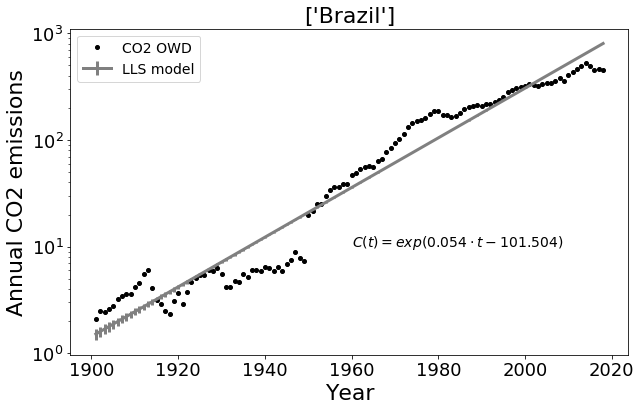

In [191]:
LLS_CO2(dfbr)

### Dado 2: Homicídios brasileiros

In [173]:
dfhm = pd.read_csv('homicidios.csv',sep = ';')
dfhm.head()

,cod,nome,período,valor
0,1076,BRA,1979,11217
1,1076,BRA,1980,13911
2,1076,BRA,1981,15216
3,1076,BRA,1982,15554
4,1076,BRA,1983,17410


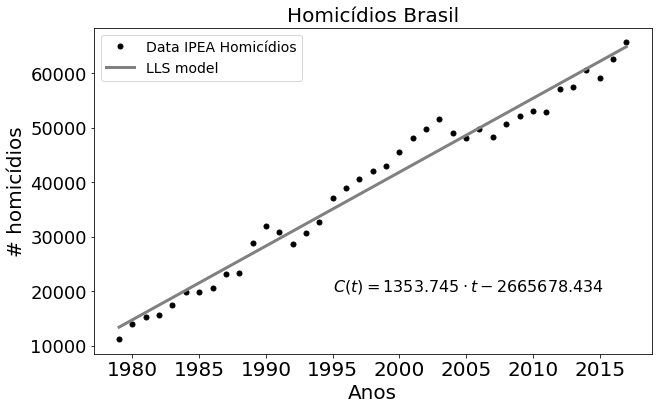

In [216]:
X = np.array(dfhm['período'])
Y = np.array(dfhm['valor'])

parms, error = LLS_linear(X,Y)

fig, axs = plt.subplots(figsize = (10,6))

axs.plot(X,Y,'o', color = 'black', markersize = 5, label = 'Data IPEA Homicídios')
axs.plot(X, parms[0]*X + parms[1],color = 'gray', linewidth = 3, label = 'LLS model')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 18)

axs.set_ylabel("# homicídios", fontsize = 20)
axs.set_xlabel("Anos", fontsize = 20)
axs.set_title('Homicídios Brasil', fontsize = 20)

axs.text(1995, 20000, '$C(t) = {}\cdot t {}$'.format(np.round(parms[0],3),np.round(parms[1],3)), fontsize = 16)

axs.legend(fontsize = 14)

### Dado 3: CO2 data OWID

In [325]:
df = pd.read_csv('owid-co2-data.csv')
dfbr = df[df['country'] == 'Brazil']
dfbr.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
3108,BRA,Brazil,1901,2.103,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18513216.0,1.199158e+10
3109,BRA,Brazil,1902,2.506,19.164,0.403,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18923954.0,1.198292e+10
3110,BRA,Brazil,1903,2.440,-2.632,-0.066,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19341472.0,1.221766e+10
3111,BRA,Brazil,1904,2.620,7.357,0.180,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19762800.0,1.245733e+10
3112,BRA,Brazil,1905,2.799,6.853,0.180,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20187716.0,1.282192e+10


In [326]:
T = dfbr['year']

Text(0.5, 0, 'Year')

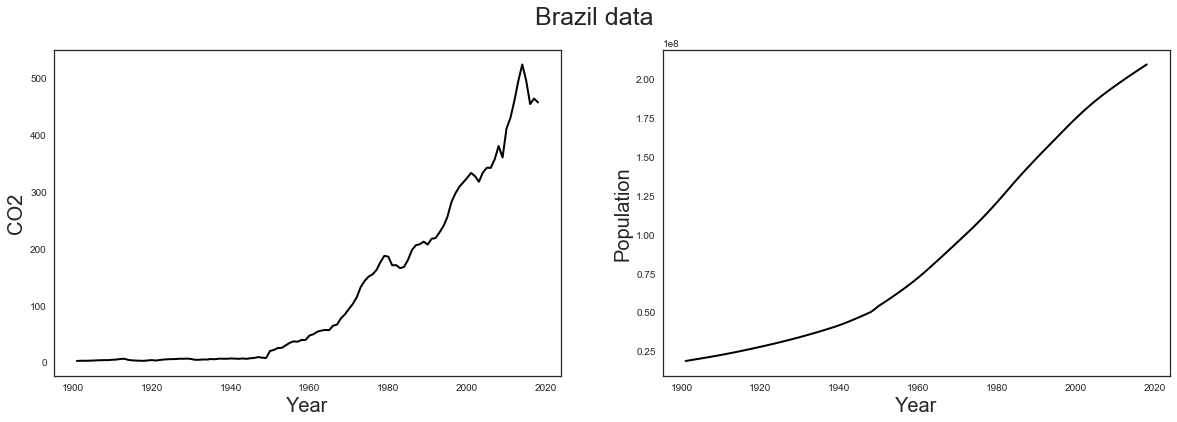

In [327]:
fig, axs = plt.subplots(1,2, figsize = (20,6))
fig.suptitle('Brazil data', fontsize = 25)

axs[0].plot(T,dfbr['co2'],color = 'black', linewidth = 2)
axs[0].set_ylabel('CO2', fontsize = 20)
axs[0].set_xlabel('Year', fontsize = 20)

axs[1].plot(T,dfbr['population'], color = 'black',linewidth = 2)
axs[1].set_ylabel('Population', fontsize = 20)
axs[1].set_xlabel('Year', fontsize = 20)


In [334]:
P = np.log(dfbr['population'])
C = np.log(dfbr['co2'])

parms = LLS_multiple(T,P,C)
print('Equation: {} + {} x1 + {} x2 '.format(np.round(parms[0,0],3),np.round(parms[1,0],3),np.round(parms[2,0],3)))

Equation: -1901.0 + 1.0 x1 + 0.0 x2 


In [333]:
xx, yy = np.meshgrid(T, P, sparse=True)
zz =  parms[0,0] + xx*parms[1,0] + yy*parms[2,0]

In [298]:
from mpl_toolkits.mplot3d import Axes3D

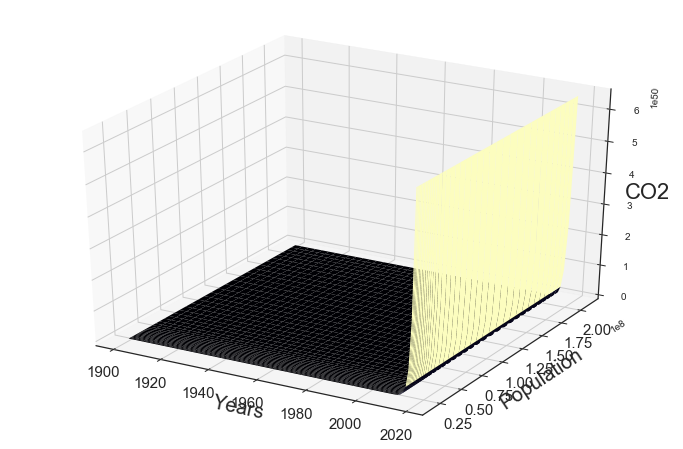

In [319]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')
ax.plot_surface(xx, np.exp(yy), np.exp(zz), cmap='magma')
ax.set_xlabel('Years', fontsize = 20)
ax.set_ylabel('Population', fontsize = 20)
ax.set_zlabel('CO2',fontsize = 22)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()